<a href="https://colab.research.google.com/github/Savvythelegend/MLE/blob/main/programming/PythonForML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vizuara ML

**Programming for ML (Python)** *programming in the context of ML*
*[Notes](https://miro.com/app/board/uXjVIMtrsNw=/)*

## Matrix Multiplication

In [ ]:
"""Matrix Multiplication (Manual Implementation)
A: 2x3 matrix
B: 3x2 matrix
Result C: 2x2 matrix
"""

# Define matrices
A = [
    [1, 2, 3],
    [4, 5, 6]
]

B = [
    [10, 11],
    [20, 21],
    [30, 31]
]

# Initialize result with zeros (2x2)
C = [[0, 0], [0, 0]]

# Perform multiplication
for i in range(len(A)):          # rows of A
    for j in range(len(B[0])):   # cols of B
        for k in range(len(B)):  # shared dimension
            C[i][j] += A[i][k] * B[k][j]

# Print result
print("Result of A x B =")
for row in C:
    print(row)

Result of A x B =
[140, 146]
[320, 335]


## Classes in Python

In [ ]:
class Book:
    """Base Class: Book
    Common attributes: title, author, pages"""
    def __init__(self, title, author, pages):
        self.title = title
        self.author = author
        self.pages = pages

    def info(self):
        return f"{self.title} by {self.author}, {self.pages} pages"


class EBook(Book):
    """Child Class: EBook
    Inherits Book, adds file_size"""
    def __init__(self, title, author, pages, file_size):
        super().__init__(title, author, pages)
        self.file_size = file_size

    def info(self):
        return f"{super().info()} [EBook, {self.file_size} MB]"


class AudioBook(EBook):
    """Child Class: AudioBook
    Inherits EBook, adds duration"""
    def __init__(self, title, author, pages, file_size, duration):
        super().__init__(title, author, pages, file_size)
        self.duration = duration

    def info(self):
        return f"{super().info()} [AudioBook, {self.duration} minutes]"


# --- Usage ---
book1 = Book("1984", "George Orwell", 328)
ebook1 = EBook("Clean Code", "Robert Martin", 464, 5)
audio1 = AudioBook("Atomic Habits", "James Clear", 320, 10, 30)

print(book1.info())
print(ebook1.info())
print(audio1.info())

1984 by George Orwell, 328 pages
Clean Code by Robert Martin, 464 pages [EBook, 5 MB]
Atomic Habits by James Clear, 320 pages [EBook, 10 MB] [AudioBook, 30 minutes]


## Python Classes & Objects in the context of ML

### Linear Regression from scratch

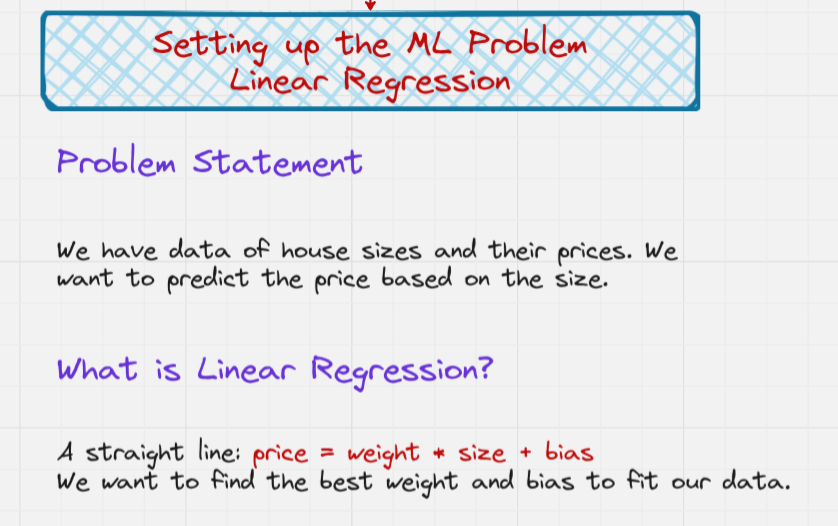

In [1]:
# Step 1: Importing necessary library
import numpy as np

# Step 2: Define our Linear Regression class
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weight = 0
        self.bias = 0

    def predict(self, X):
        return self.weight * X + self.bias

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, X, y):
        n = len(X)

        for i in range(self.epochs):
            y_pred = self.predict(X)
            dw = (-2/n) * np.sum(X * (y - y_pred))
            db = (-2/n) * np.sum(y - y_pred)

            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 1000 == 0:
                loss = self.compute_loss(y, y_pred)
                print(f"Epoch {i}, Loss: {loss:.4f}, Weight: {self.weight:.4f}, Bias: {self.bias:.4f}")

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        loss = self.compute_loss(y, y_pred)
        print(f"Final Loss: {loss:.4f}")

In [2]:
# Creating some sample data
X = np.array([1, 2, 3, 4, 5], dtype=np.float32)
y = np.array([2, 4, 6, 8, 10], dtype=np.float32)

X2 = np.array([1, 2, 3, 4, 5], dtype=np.float32)
y2 = np.array([3, 6, 9, 12, 15], dtype=np.float32)

# Create an object of our class
model = LinearRegression(learning_rate=0.01, epochs=2000)
model2 = LinearRegression(learning_rate=0.01, epochs=2000)

# Train the model
model.fit(X, y)
model2.fit(X2,y2)

# Evaluate the model
model.evaluate(X, y)
model2.evaluate(X2,y2)

# Make a prediction
print("Predicted price for size (model 1):", model.predict(9))
print("Predicted price for size (model 2):", model2.predict(9))

Epoch 0, Loss: 44.0000, Weight: 0.4400, Bias: 0.1200
Epoch 1000, Loss: 0.0001, Weight: 1.9952, Bias: 0.0173
Epoch 0, Loss: 99.0000, Weight: 0.6600, Bias: 0.1800
Epoch 1000, Loss: 0.0001, Weight: 2.9928, Bias: 0.0260
Final Loss: 0.0000
Final Loss: 0.0000
Predicted price for size (model 1): 17.99912
Predicted price for size (model 2): 26.99868


*btw the price isn't $17, it's 17k (in dollars) 😒*